## Linear Regression with Single Feature

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Functions

In [767]:
#Function to compute cost function
def ComputeJ(X, Y, theta):
    m = len(Y)
    J = (1 / (2 * m)) * np.sum((X.dot(theta) - Y)**2)
    return J

In [839]:
# Gradient Descent
def GradientDescent(X, Y, theta, alpha, num_iterations):
    #initialize variables
    m = len(Y)
    J_curve = []
    
    #loop for iterations of gradient descent
    for i in range(num_iterations):
        theta = theta - alpha * (1/m) * np.dot(X.transpose(), (X.dot(theta) - Y))
        J_curve = np.append(J_curve, ComputeJ(X, Y, theta))
    return J_curve, theta

In [769]:
# Feature Normalization
def FeatureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X, mean, std

## Linear Regression with Single Feature

In [664]:
#import data
df = pd.read_csv('/home/smhaladuick/local/andrew_ng/ex1data1.csv', header=None)

In [665]:
df.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [666]:
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Vs Population')

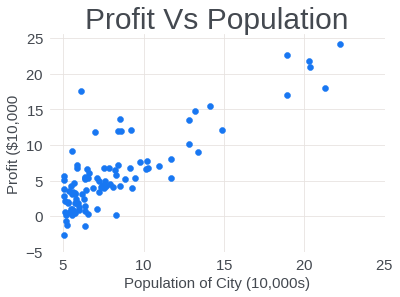

In [667]:
plt.scatter(df[0], df[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")

In [668]:
#initialize variables
m = np.size(df,0)
X = np.array(df[0])
X = np.append(np.ones((m,1)), X.reshape(m,1), axis=1)
Y = np.array(df[1]).reshape(m,1)

#initial guess of theta
theta = np.array([[0, 0]]).T

In [669]:
theta = np.array([[0, 0]]).T
J_curve, theta = gradient_descent(X, Y, theta, 0.01, 1500)

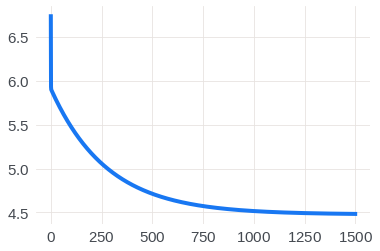

In [670]:
plt.plot(J_curve)

In [671]:
theta

array([[-3.63029144],
       [ 1.16636235]])

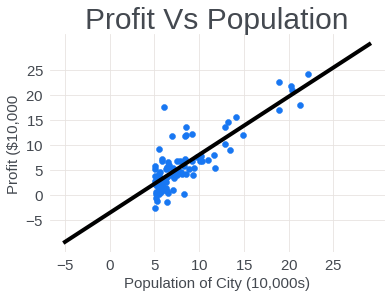

In [672]:
plt.scatter(df[0], df[1])
plt.xticks(np.arange(-5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")

#add regression line
x_values = [x for x in range(-5, 30)]
y_values = theta[0] + theta[1] * x_values
plt.plot(x_values, y_values, color ='black')

In [673]:
#make predictions of cost given X based on model
def predict(x, theta):
    y = theta[0] + theta[1] * x
    return y

In [674]:
prediction = predict(70000 / 10000, theta)
prediction * 10000

array([45342.45012945])

## Linear Regression with Multiple Variables

In [697]:
#import data
df2 = pd.read_csv('/home/smhaladuick/local/andrew_ng/ex1/ex1data2.txt', header=None)

In [698]:
df2.head(5)

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [699]:
df2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


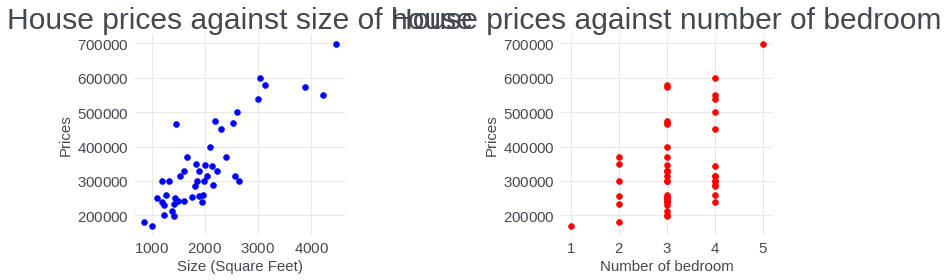

In [700]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(df2[0],df2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(df2[1],df2[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

In [855]:
#initialize variables
m2 = np.size(df2,0)
data_n2 = df2.values
X2 = data_n2[:,[0,1]].reshape(m2,2)
Y2 = data_n2[:,[2]].reshape(m2,1)

In [854]:
#normalize features
X2_norm, mean, std = FeatureNormalization(X2)
X2_norm

# add ones col to start of X
X2_norm = np.append(np.ones((m2,1)), X2_norm, axis=1)

([array([ 0.,  0.,  0.,  0.,  0.,  0., 47.,  0.,  0.,  0.]),
  array([ 0.,  0.,  3., 15., 13.,  8.,  4.,  1.,  1.,  2.]),
  array([ 1.,  0.,  6.,  0., 25.,  0., 14.,  0.,  1.,  0.])],
 array([-2.88269044, -2.27932207, -1.6759537 , -1.07258533, -0.46921696,
         0.13415141,  0.73751978,  1.34088815,  1.94425652,  2.54762489,
         3.15099326]),
 <a list of 3 Lists of Patches objects>)

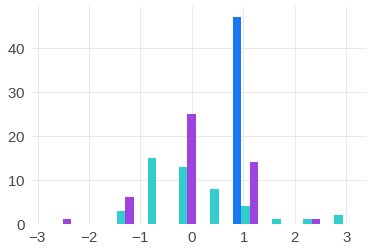

In [772]:
plt.hist(X2_norm[:,[0, 1,2]])

In [840]:
theta2 = np.array([[0, 0, 0]]).T #initial guess
ComputeJ(X2_norm, Y2, theta2) #test ComputeJ cost function

65591548106.45744

In [841]:
theta2 = np.array([[0, 0, 0]]).T #initial guess
J_curve, theta2 = GradientDescent(X2_norm,Y2,theta2,0.01,400)

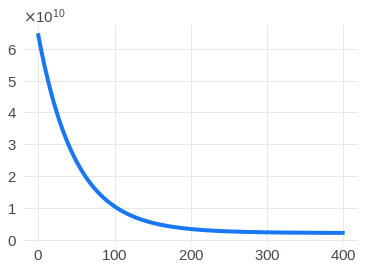

In [842]:
plt.plot(J_curve)

In [849]:
theta2

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [916]:
#make prediction of cost of house s 1650 sq_ft and 3 bedrooms
#normalize inputs:
x2_input = [1650, 3]
x2_input_norm = (x2_input - np.mean(X2,axis=0)) / np.std(X2, axis=0)
x2_input_norm = np.insert(x2_input_norm, 0, 1)
y2_prediction = np.dot(theta2.T, x2_input_norm)
y2_prediction

array([289221.54737122])

## 3.3 Normal Equations

In [917]:
X2_normaleq = np.append(np.ones((m2,1)), X2, axis=1)

In [918]:
def NormEq(X,Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

In [919]:
theta_normaleq =[]
theta_normaleq = NormEq(X2_normaleq, Y2)
theta_normaleq

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])